# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 469.7 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.6 MB 731.4 kB/s eta 0:00:53
   ---------------------------------------- 0.1/38.6 MB 731.4 kB/s eta 0:00:53
   ---------------------------------------- 0.1/38.6 MB 554.9 kB/s eta 0:01:10
   ---------------------------------------- 0.1/38.6 MB 554.9 kB/s eta 0:01:10
   ---------------------------------------- 0.1/38.6 MB 554.9 kB/s eta 0:01:10
   ---------------------------------------- 0.2/38.6 MB 513.4 kB/s eta 0:01:15
   ---------------------------------------- 0.2/38.6 MB 580.1 kB/s eta 0:01:07
   ---------------------------------------- 0.3

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Alii\AppData\Local\Temp\pip-install-c58m9yp6\tensorflow-gpu_7d6073d5e85145209990148a567643ff\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-b

In [3]:
import tensorflow as tf
import os

In [6]:
import cv2
import imghdr

C:\Users\Alii\AppData\Local\Temp\ipykernel_13668\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 788 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

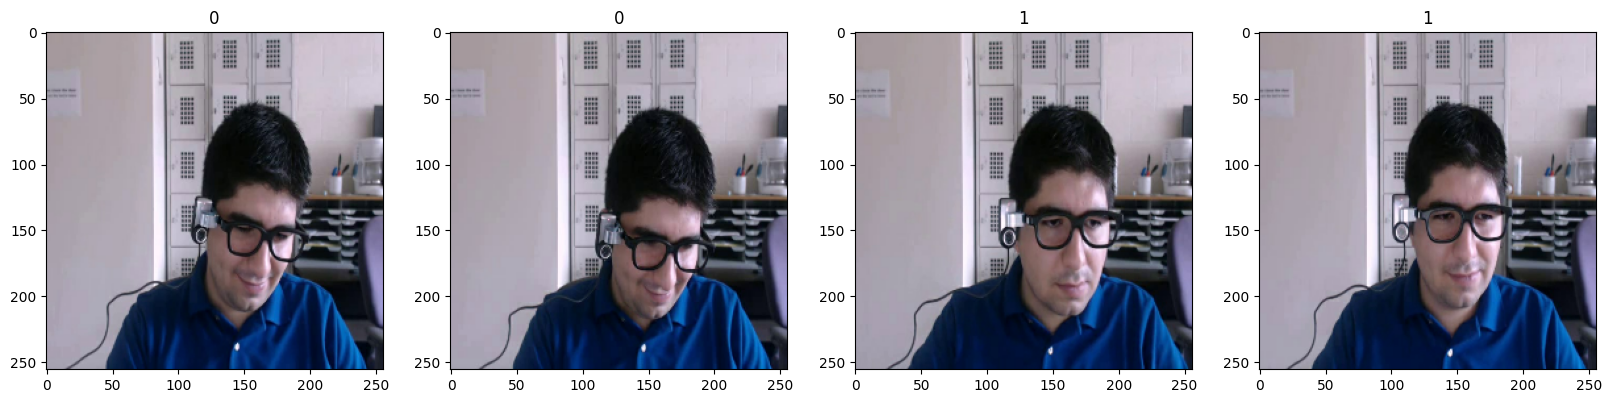

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.76004905, 0.7051471 , 0.6698529 ],
          [0.7639706 , 0.70906866, 0.6580882 ],
          [0.7682598 , 0.7094363 , 0.6349265 ],
          ...,
          [0.46948528, 0.4067402 , 0.34754902],
          [0.44852942, 0.4057598 , 0.31838235],
          [0.41960785, 0.39215687, 0.2901961 ]],
 
         [[0.7607843 , 0.7058824 , 0.65710783],
          [0.7579657 , 0.7030637 , 0.65208334],
          [0.7719363 , 0.7131128 , 0.6386029 ],
          ...,
          [0.48921567, 0.44105393, 0.3839461 ],
          [0.45441177, 0.41127452, 0.33284312],
          [0.45159313, 0.41286764, 0.32218137]],
 
         [[0.75870097, 0.7155637 , 0.6449755 ],
          [0.7647059 , 0.7137255 , 0.6509804 ],
          [0.7547794 , 0.703799  , 0.63713235],
          ...,
          [0.42083332, 0.37169117, 0.33088234],
          [0.47916666, 0.42818627, 0.36360294],
          [0.4417892 , 0.3947304 , 0.30845588]],
 
         ...,
 
         [[0.7409314 , 0.7017157 , 0.6546569 ],
          [0.73615

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
shuffled_data = data.shuffle(buffer_size=len(data), seed=42)

17

In [19]:
train = suffled_data.take(train_size)
val = shuffled_data.skip(train_size).take(val_size)
test = shuffled_data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Convolutional layers
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

# Dense layers
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))  # Adding dropout for regularization
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
model2.summary()

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 14s 649ms/step - loss: 0.6427 - accuracy: 0.7004 - val_loss: 0.2802 - val_accuracy: 0.9312
Epoch 2/20
17/17 [==============================] - 27s 2s/step - loss: 0.1891 - accuracy: 0.9173 - val_loss: 0.1290 - val_accuracy: 0.9500
Epoch 3/20
17/17 [==============================] - 37s 2s/step - loss: 0.0885 - accuracy: 0.9632 - val_loss: 0.1131 - val_accuracy: 0.9812
Epoch 4/20
17/17 [==============================] - 38s 2s/step - loss: 0.0586 - accuracy: 0.9779 - val_loss: 0.0459 - val_accuracy: 0.9937
Epoch 5/20
17/17 [==============================] - 40s 2s/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.1037 - val_accuracy: 0.9812
Epoch 6/20
17/17 [==============================] - 38s 2s/step - loss: 0.0430 - accuracy: 0.9816 - val_loss: 0.0239 - val_accuracy: 0.9937
Epoch 7/20
17/17 [==============================] - 37s 2s/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.0667 - val_accuracy: 0.9937
Epoch 8/20
17/17 

# 8. Plot Performance

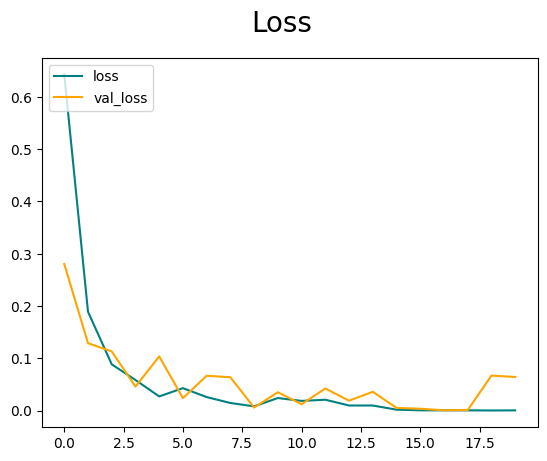

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

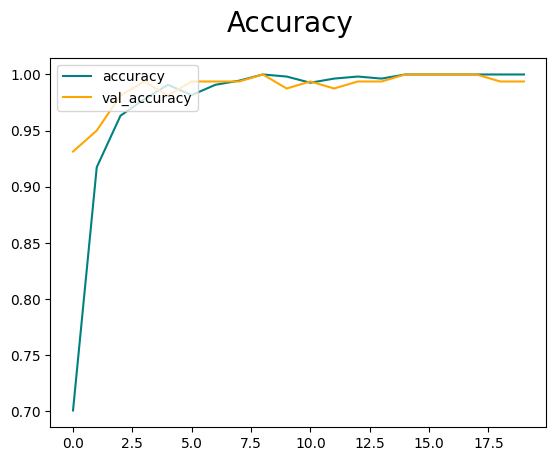

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 555ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

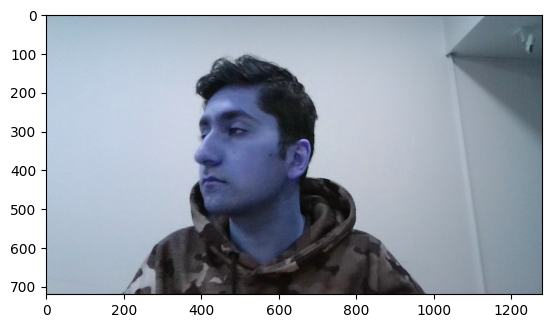

In [57]:
img = cv2.imread(r"C:\Users\Alii\Desktop\Caspian\computer vision\data\cheat\WIN_20240313_09_20_10_Pro.jpg")
plt.imshow(img)
plt.show()

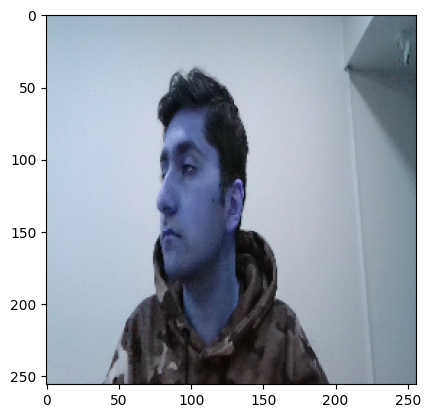

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [60]:
yhat

array([[0.00056517]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print('Normal')
else:
    print('Cheat')

Cheat


# 11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','test_cheat.h5'))

C:\Users\Alii\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
new_model = load_model(r"C:\Users\Alii\Desktop\Caspian\computer vision\models\test_cheat.h5")

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 194ms/step


array([[0.00056517]], dtype=float32)